# Ideation

More backtesting, except NHL instead and NFL and moneyline instead of the spread/puckline.


Other columns that I can add:
* Playoff team last year? [need additional data but easy to get]
* Current record [can calculate] 
* Power rankings based on last few games won/differential [can calculate]
* last few games won rather than just diff [can calculate]
* GF / GA [can calculate]
* espn 'hype' / twitter hype [need additional data]
* itra division [need additional info - keep track of teams changing divisions by year]

Other ideas:
* create a correlation matrix for home_diff and build strategies based on that
* create a correlation matrix for home_diff vs spread and build strategies based on that
* ML model - predict on % chance of home team winning? - predict_proba ?


In [10]:
import pandas as pd
from collections import deque
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nhl_odds = pd.read_csv('combined_nhl_odds.csv')
nhl_odds

,Unnamed: 0,Date,AwayTeam,Away1st,Away2nd,Away3rd,AwayFinal,MlAwayOpen,MlAwayClose,OpenOU,...,Year,HomeTeam,Home1st,Home2nd,Home3rd,HomeFinal,MlHomeOpen,MlHomeClose,OpenUOdds,CloseUOdds
0,0,929,Anaheim,0,0,1,1,-155.0,-123.0,6.0,...,2008,LosAngeles,1.0,1.0,2.0,4.0,135.0,103.0,-120.0,-115.0
1,2,930,LosAngeles,0,1,0,1,115.0,132.0,6.0,...,2008,Anaheim,2.0,2.0,0.0,4.0,-135.0,-152.0,-105.0,-132.0
2,4,1003,Anaheim,0,2,0,2,165.0,190.0,5.5,...,2008,Detroit,1.0,0.0,1.0,3.0,-185.0,-230.0,-125.0,-140.0
3,6,1003,Montreal,1,0,1,3,130.0,140.0,6.0,...,2008,Carolina,1.0,0.0,1.0,2.0,-150.0,-160.0,-115.0,-130.0
4,8,1003,Ottawa,2,0,1,4,-120.0,-125.0,6.0,...,2008,Toronto,2.0,1.0,0.0,3.0,100.0,105.0,100.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17528,1894,628,Montreal,0,1,0,1,185.0,180.0,5.0,...,2021,TampaBay,1.0,1.0,3.0,5.0,-225.0,-200.0,100.0,105.0
17529,1896,630,Montreal,0,1,0,1,180.0,177.0,5.0,...,2021,TampaBay,0.0,2.0,1.0,3.0,-220.0,-197.0,100.0,100.0
17530,1898,702,TampaBay,2,2,2,6,-145.0,-123.0,5.0,...,2021,Montreal,1.0,1.0,1.0,3.0,125.0,113.0,100.0,100.0
17531,1900,705,TampaBay,0,1,1,2,-145.0,-150.0,5.0,...,2021,Montreal,1.0,0.0,1.0,3.0,125.0,135.0,115.0,120.0


In [3]:
# TODO: add divisions, days of rest

In [4]:
nhl_odds_aux = nhl_odds
nhl_odds_aux['home_point_diff'] = nhl_odds_aux.apply(lambda row: row.HomeFinal - row.AwayFinal, axis=1)
nhl_odds_aux['away_point_diff'] = nhl_odds_aux.apply(lambda row: row.AwayFinal - row.HomeFinal, axis=1)


nhl_odds_aux


,Unnamed: 0,Date,AwayTeam,Away1st,Away2nd,Away3rd,AwayFinal,MlAwayOpen,MlAwayClose,OpenOU,...,Home1st,Home2nd,Home3rd,HomeFinal,MlHomeOpen,MlHomeClose,OpenUOdds,CloseUOdds,home_point_diff,away_point_diff
0,0,929,Anaheim,0,0,1,1,-155.0,-123.0,6.0,...,1.0,1.0,2.0,4.0,135.0,103.0,-120.0,-115.0,3.0,-3.0
1,2,930,LosAngeles,0,1,0,1,115.0,132.0,6.0,...,2.0,2.0,0.0,4.0,-135.0,-152.0,-105.0,-132.0,3.0,-3.0
2,4,1003,Anaheim,0,2,0,2,165.0,190.0,5.5,...,1.0,0.0,1.0,3.0,-185.0,-230.0,-125.0,-140.0,1.0,-1.0
3,6,1003,Montreal,1,0,1,3,130.0,140.0,6.0,...,1.0,0.0,1.0,2.0,-150.0,-160.0,-115.0,-130.0,-1.0,1.0
4,8,1003,Ottawa,2,0,1,4,-120.0,-125.0,6.0,...,2.0,1.0,0.0,3.0,100.0,105.0,100.0,115.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17528,1894,628,Montreal,0,1,0,1,185.0,180.0,5.0,...,1.0,1.0,3.0,5.0,-225.0,-200.0,100.0,105.0,4.0,-4.0
17529,1896,630,Montreal,0,1,0,1,180.0,177.0,5.0,...,0.0,2.0,1.0,3.0,-220.0,-197.0,100.0,100.0,2.0,-2.0
17530,1898,702,TampaBay,2,2,2,6,-145.0,-123.0,5.0,...,1.0,1.0,1.0,3.0,125.0,113.0,100.0,100.0,-3.0,3.0
17531,1900,705,TampaBay,0,1,1,2,-145.0,-150.0,5.0,...,1.0,0.0,1.0,3.0,125.0,135.0,115.0,120.0,1.0,-1.0


In [5]:
def format_date(date, year):
    datestr = str(date)
    month = datestr[:-2]
    day = datestr[-2:]
    # due to covid, the 2021 season was played entirely in 2021 (no games in oct-dec)
    # and the 2020 season stopped in the middle and resumed in aug/sep
    if(year != 2020 and year != 2021):
        # Game was played from Oct-Dec, ie the previous year
        if(date > 900):
            year -= 1
    elif(year == 2020 and date > 930):
            year -= 1
    return dt.datetime(year, int(month), int(day))

nhl_odds_aux['RealDate'] = nhl_odds_aux.apply(lambda row: format_date(row.Date, row.Year), axis=1)
nhl_odds_aux



,Unnamed: 0,Date,AwayTeam,Away1st,Away2nd,Away3rd,AwayFinal,MlAwayOpen,MlAwayClose,OpenOU,...,Home2nd,Home3rd,HomeFinal,MlHomeOpen,MlHomeClose,OpenUOdds,CloseUOdds,home_point_diff,away_point_diff,RealDate
0,0,929,Anaheim,0,0,1,1,-155.0,-123.0,6.0,...,1.0,2.0,4.0,135.0,103.0,-120.0,-115.0,3.0,-3.0,2007-09-29
1,2,930,LosAngeles,0,1,0,1,115.0,132.0,6.0,...,2.0,0.0,4.0,-135.0,-152.0,-105.0,-132.0,3.0,-3.0,2007-09-30
2,4,1003,Anaheim,0,2,0,2,165.0,190.0,5.5,...,0.0,1.0,3.0,-185.0,-230.0,-125.0,-140.0,1.0,-1.0,2007-10-03
3,6,1003,Montreal,1,0,1,3,130.0,140.0,6.0,...,0.0,1.0,2.0,-150.0,-160.0,-115.0,-130.0,-1.0,1.0,2007-10-03
4,8,1003,Ottawa,2,0,1,4,-120.0,-125.0,6.0,...,1.0,0.0,3.0,100.0,105.0,100.0,115.0,-1.0,1.0,2007-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17528,1894,628,Montreal,0,1,0,1,185.0,180.0,5.0,...,1.0,3.0,5.0,-225.0,-200.0,100.0,105.0,4.0,-4.0,2021-06-28
17529,1896,630,Montreal,0,1,0,1,180.0,177.0,5.0,...,2.0,1.0,3.0,-220.0,-197.0,100.0,100.0,2.0,-2.0,2021-06-30
17530,1898,702,TampaBay,2,2,2,6,-145.0,-123.0,5.0,...,1.0,1.0,3.0,125.0,113.0,100.0,100.0,-3.0,3.0,2021-07-02
17531,1900,705,TampaBay,0,1,1,2,-145.0,-150.0,5.0,...,0.0,1.0,3.0,125.0,135.0,115.0,120.0,1.0,-1.0,2021-07-05


In [6]:
team_to_games = {}
team_to_last_game_played = {}

for index, row in nhl_odds_aux.iterrows():

    # Update the mapping
    if row.HomeTeam not in team_to_games:
        team_to_games.update({row.HomeTeam : deque([0,0,0])})
        team_to_last_game_played.update({row.HomeTeam : dt.datetime(2007, 7, 1)})

    if row.AwayTeam not in team_to_games:
        team_to_games.update({row.AwayTeam : deque([0,0,0])})
        team_to_last_game_played.update({row.AwayTeam : dt.datetime(2007, 7, 1)})


    last_games = team_to_games.get(row.HomeTeam)
    home_last_3 = last_games[0] + last_games[1] + last_games[2]
    home_last_1 = last_games[0]
    last_games.pop()
    last_games.appendleft(row.home_point_diff)

    last_games = team_to_games.get(row.AwayTeam)
    away_last_3 = last_games[0] + last_games[1] + last_games[2]
    away_last_1 = last_games[0]
    last_games.pop()
    last_games.appendleft(row.away_point_diff)

    nhl_odds_aux.at[index, 'home_last_3'] = home_last_3
    nhl_odds_aux.at[index, 'away_last_3'] = away_last_3
    nhl_odds_aux.at[index, 'home_last_1'] = home_last_1
    nhl_odds_aux.at[index, 'away_last_1'] = away_last_1

    nhl_odds_aux.at[index, 'home_rest'] = (row.RealDate - team_to_last_game_played.get(row.HomeTeam)).days
    nhl_odds_aux.at[index, 'away_rest'] = (row.RealDate - team_to_last_game_played.get(row.AwayTeam)).days

    team_to_last_game_played.update({row.HomeTeam : row.RealDate})
    team_to_last_game_played.update({row.AwayTeam : row.RealDate})


nhl_odds_aux





,Unnamed: 0,Date,AwayTeam,Away1st,Away2nd,Away3rd,AwayFinal,MlAwayOpen,MlAwayClose,OpenOU,...,CloseUOdds,home_point_diff,away_point_diff,RealDate,home_last_3,away_last_3,home_last_1,away_last_1,home_rest,away_rest
0,0,929,Anaheim,0,0,1,1,-155.0,-123.0,6.0,...,-115.0,3.0,-3.0,2007-09-29,0.0,0.0,0.0,0.0,90.0,90.0
1,2,930,LosAngeles,0,1,0,1,115.0,132.0,6.0,...,-132.0,3.0,-3.0,2007-09-30,-3.0,3.0,-3.0,3.0,1.0,1.0
2,4,1003,Anaheim,0,2,0,2,165.0,190.0,5.5,...,-140.0,1.0,-1.0,2007-10-03,0.0,0.0,0.0,3.0,94.0,3.0
3,6,1003,Montreal,1,0,1,3,130.0,140.0,6.0,...,-130.0,-1.0,1.0,2007-10-03,0.0,0.0,0.0,0.0,94.0,94.0
4,8,1003,Ottawa,2,0,1,4,-120.0,-125.0,6.0,...,115.0,-1.0,1.0,2007-10-03,0.0,0.0,0.0,0.0,94.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17528,1894,628,Montreal,0,1,0,1,185.0,180.0,5.0,...,105.0,4.0,-4.0,2021-06-28,8.0,3.0,1.0,1.0,3.0,4.0
17529,1896,630,Montreal,0,1,0,1,180.0,177.0,5.0,...,100.0,2.0,-2.0,2021-06-30,4.0,0.0,4.0,-4.0,2.0,2.0
17530,1898,702,TampaBay,2,2,2,6,-145.0,-123.0,5.0,...,100.0,-3.0,3.0,2021-07-02,-5.0,7.0,-2.0,2.0,2.0,2.0
17531,1900,705,TampaBay,0,1,1,2,-145.0,-150.0,5.0,...,120.0,1.0,-1.0,2021-07-05,-9.0,9.0,-3.0,3.0,3.0,3.0


[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'Date'),
 Text(2.5, 0, 'Away1st'),
 Text(3.5, 0, 'Away2nd'),
 Text(4.5, 0, 'Away3rd'),
 Text(5.5, 0, 'AwayFinal'),
 Text(6.5, 0, 'MlAwayOpen'),
 Text(7.5, 0, 'MlAwayClose'),
 Text(8.5, 0, 'OpenOU'),
 Text(9.5, 0, 'OpenOOdds'),
 Text(10.5, 0, 'CloseOU'),
 Text(11.5, 0, 'CloseOOdds'),
 Text(12.5, 0, 'Year'),
 Text(13.5, 0, 'Home1st'),
 Text(14.5, 0, 'Home2nd'),
 Text(15.5, 0, 'Home3rd'),
 Text(16.5, 0, 'HomeFinal'),
 Text(17.5, 0, 'MlHomeOpen'),
 Text(18.5, 0, 'MlHomeClose'),
 Text(19.5, 0, 'OpenUOdds'),
 Text(20.5, 0, 'CloseUOdds'),
 Text(21.5, 0, 'home_point_diff'),
 Text(22.5, 0, 'away_point_diff'),
 Text(23.5, 0, 'home_last_3'),
 Text(24.5, 0, 'away_last_3'),
 Text(25.5, 0, 'home_last_1'),
 Text(26.5, 0, 'away_last_1'),
 Text(27.5, 0, 'home_rest'),
 Text(28.5, 0, 'away_rest')]

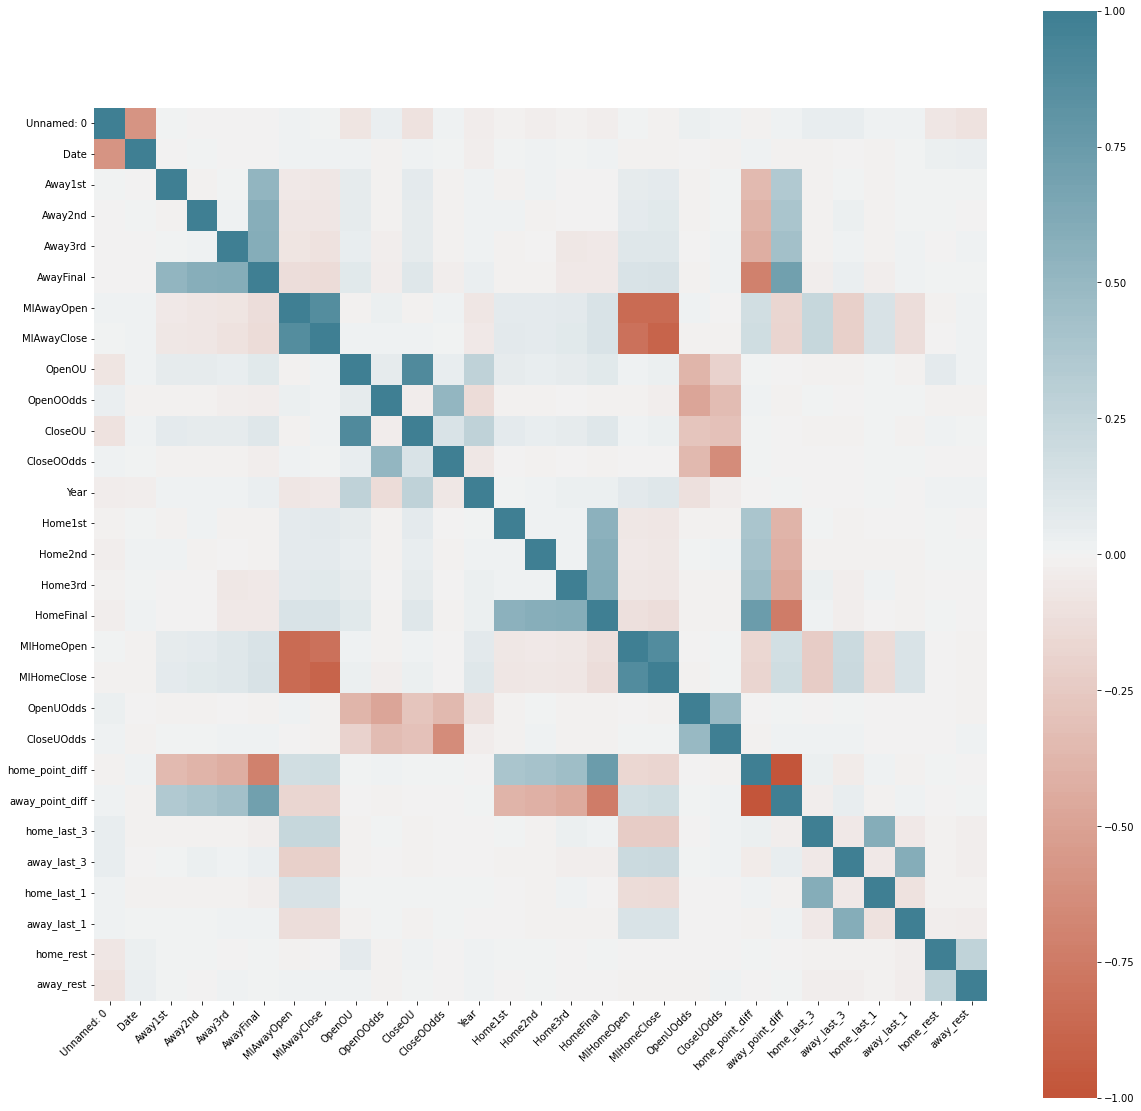

In [11]:
# Correlation
corr = nhl_odds_aux.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
STARTING_MONEY = 10000
BET_SIZE = 300

def calculate_profit(odds, wager):
    # -101 and beyond
    if(odds < 0):
        return int((100 / abs(odds)) * wager)
    # +100 and beyond
    return int((odds / 100) * wager)

def add_profit_by_year(year, profit_by_year, profit):
    profit_by_year.update({year: profit_by_year.get(year, 0) + profit})

def get_implied_prob(odds):
    #Negative American odds / (Negative American odds + 100) * 100 = implied probability
    if(odds < 0):
        return odds / (odds + 100) * 100
    # 100 / (positive American odds + 100) * 100 = implied probability
    return 100 / (odds + 100) * 100


def bet_home(money, odds, won, loss, gross_profit, total_risked, year, profit_by_year):
    total_risked += BET_SIZE

    if row.home_point_diff > 0:
        money += calculate_profit(odds, BET_SIZE)
        gross_profit += calculate_profit(odds, BET_SIZE)
        add_profit_by_year(year, profit_by_year, calculate_profit(odds, BET_SIZE))
        won += 1
    # No ties in hockey since the full season lockout
    else:
        money -= BET_SIZE
        add_profit_by_year(year, profit_by_year, -BET_SIZE)
        loss +=1
    return money, won, loss, gross_profit, total_risked, profit_by_year

def bet_away(money, odds, won, loss, gross_profit, total_risked, year, profit_by_year):
    total_risked += BET_SIZE

    if row.away_point_diff > 0:
        money += calculate_profit(odds, BET_SIZE)
        gross_profit += calculate_profit(odds, BET_SIZE)
        add_profit_by_year(year, profit_by_year, calculate_profit(odds, BET_SIZE))
        won += 1
    # No ties in hockey since the full season lockout
    else:
        money -= BET_SIZE
        add_profit_by_year(year, profit_by_year, -BET_SIZE)
        loss += 1
    return money, won, loss, gross_profit, total_risked, profit_by_year

def set_vars():
    money = STARTING_MONEY
    won = 0
    loss = 0
    total_risked = 0
    gross_profit = 0
    sample_set = []
    profit_by_year = {}
    return money, won, loss, gross_profit, total_risked, profit_by_year

In [ ]:
money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()
def print_stats():
    print('Money left: ' + str(money))
    print('Record: ' + str(won) + '-' + str(loss))
    print('Gross Winnings: ' + str(gross_profit))
    print('Total Risked: ' + str(total_risked))

    net_profit = money - STARTING_MONEY
    print('ROI: ' + str(round(net_profit/total_risked, 2) * 100) + '%')
    print('Norm Winning: ' + str(round(gross_profit/total_risked, 2) * 100) + '%')
    print('Profit by year')
    print(profit_by_year)

for row in nhl_odds_aux.itertuples():

    if (row.MlHomeClose < row.MlAwayClose):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_home(money, row.MlHomeClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the home favourite")
print_stats()

#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose > row.MlHomeClose):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away underdog")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose > 100):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away underdog with positive odds")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose < row.MlHomeClose ):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away favourite with positive odds")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose > row.MlHomeClose and row.MlAwayClose > row.MlAwayOpen):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away underdog when the line moves against them")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose > row.MlHomeClose and row.MlAwayClose - 100 > row.MlAwayOpen):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away underdog when the line moves against them by at least 100 odds")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose > row.MlHomeClose and row.MlAwayClose - 200 > row.MlAwayOpen):
        money, won, loss, gross_profit, total_risked, profit_by_year= bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away underdog when the line moves against them by at least 200 odds")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose > row.MlHomeClose and row.MlAwayClose - 100 > row.MlAwayOpen and row.home_last_3 >= 6):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away underdog when the line moves against them by at least 100 odds and the home team won the last 3 games by >=6")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose > row.MlHomeClose and row.away_rest > row.home_rest):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away underdog when they had more rest than the home team with positive line movement")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.away_rest >= 2 and row.home_rest == 1):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away team when they had at least 2 days of rest and home team is B2B")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.home_rest >= 2 and row.away_rest == 1):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_home(money, row.MlHomeClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the home team when they had at least 2 days of rest and away team is B2B")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlHomeClose > row.MlAwayClose and row.home_rest >= 2 and row.away_rest == 1):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_home(money, row.MlHomeClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the home underdog when they had at least 2 days of rest and away team is B2B")
print_stats()


#-------------------------------------

money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()
expected_win = 0


for row in nhl_odds_aux.itertuples():

    if (row.MlHomeClose < row.MlAwayClose and row.home_rest >= 2 and row.away_rest == 1):
        expected_win += get_implied_prob(row.MlAwayClose)
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_home(money, row.MlHomeClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the home favourite when they had at least 2 days of rest and away team is B2B")
print_stats()
print('Expected wins: ' + str(expected_win))


#-------------------------------------


money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlHomeClose < row.MlAwayClose and row.home_rest >= 3 and row.away_rest == 1):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_home(money, row.MlHomeClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the home favourite when they had at least 3 days of rest and away team is B2B")
print_stats()


#-------------------------------------


money, won, loss, gross_profit, total_risked, profit_by_year = set_vars()

for row in nhl_odds_aux.itertuples():

    if (row.MlAwayClose < row.MlHomeClose and row.away_rest >= 3 and row.home_rest == 1):
        money, won, loss, gross_profit, total_risked, profit_by_year = bet_away(money, row.MlAwayClose, won, loss, gross_profit, total_risked, row.Year, profit_by_year)

print("\nAlways pick the away favourite team when they had at least 3 days of rest and home team is B2B")
print_stats()



Always pick the home favourite
Money left: -141169
Record: 7334-5114
Gross Winnings: 1383031
Total Risked: 3734400
ROI: -4.0%
Norm Winning: 37.0%
Profit by year
{2008: -24888, 2009: -6752, 2010: -16059, 2011: -25109, 2012: -8709, 2013: 3576, 2014: -8898, 2015: -10258, 2016: -12231, 2017: -4984, 2018: -6243, 2019: -16337, 2020: -17355, 2021: 3078}

Always pick the away underdog
Money left: -89228
Record: 5114-7334
Gross Winnings: 2100972
Total Risked: 3734400
ROI: -3.0%
Norm Winning: 56.00000000000001%
Profit by year
{2008: 10808, 2009: -13785, 2010: -2925, 2011: 8265, 2012: -12945, 2013: -21495, 2014: -11761, 2015: -13064, 2016: -5345, 2017: -19129, 2018: -18912, 2019: 9541, 2020: 9082, 2021: -17563}

Always pick the away underdog with positive odds
Money left: -70911
Record: 4432-6611
Gross Winnings: 1902389
Total Risked: 3312900
ROI: -2.0%
Norm Winning: 56.99999999999999%
Profit by year
{2008: 8348, 2009: -12675, 2010: -3090, 2011: 9120, 2012: -11910, 2013: -22395, 2014: -5890, 2015

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f0efbe77-01fa-4860-b5ee-e7eac30d44e8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>